<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2024/2025

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 3: *Data Preparation & Dimensionality Reduction***

###**Tenggat Waktu: 19 September 2024, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab3_1806205773_Abdurrafi Arief.ipynb. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: Kamis, 19 September 2024, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam. Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.

### **Sumber:**

1. Sebagian besar materi Lab ini diambil dari Lab beberapa semester-semester sebelumnya dengan modifikasi.
2. Sumber internet lain yang digunakan juga telah dicantumkan sebagai *hyperlink* pada teks.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan penalti.

In [5]:
# Isi dengan data diri Anda
NAMA = ""
KELAS = ""
NPM = ""
USERNAME_KAGGLE = ""

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [6]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya,  dari kelas  dengan NPM , menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   ()


# Instruksi Tambahan

Dalam lab ini, pengerjaan harus dilakukan berurutan karena dataframe yang digunakan harus sama. Sebagai contoh, dataframe yang harus ditangani missing values adalah dataframe yang telah ditangani data duplikatnya.

# Data Preparation

*Data Preparation* atau *data preprocessing* adalah suatu proses **pembersihan dan transformasi** pada *raw data* **sebelum** diproses dan dianalisis untuk tahap berikutnya termasuk *Machine Learning*. Tujuan dari preparasi data adalah agar hasil analisis dan prediksi menjadi lebih akurat dan bermakna. Pernahkah Anda mendengar ungkapan "Garbage In - Garbage Out"? Dalam konteks Machine Learning, jika input data yang kita miliki buruk, maka hasil pengolahan data juga akan buruk. Data dapat diperoleh melalui berbagai cara yang seringkali menghasilkan kekurangan, seperti duplikat, nilai yang salah, nilai yang hilang, dan sebagainya. Oleh karena itu, kita perlu melakukan berbagai tahapan dalam data preparation sebagai berikut.

### Deskripsi Data

Latihan ini menggunakan Dataset mengenai kepuasan karyawan dalam bekerja dengan deskripsi kolom:

*  `EmpID` : *Identifier* unik setiap karyawan
*  `Age` : Usia karyawan dalam tahun
*  `JobLevel` : Jabatan karyawan (Intern/Fresher, Junior, Mid, Senior, dan Lead)
*  `Dept` : Departemen karyawan bekerja (IT, HR, Finance, Marketing, Sales, Legal, Operations, Customer Service)
*  `WorkEnv` : Rating lingkungan kerja (1 sampai 5)
*  `PhysicalActivityHours` : Durasi kegiatan fisik per minggu dalam jam
*  `Stress` : Rating tingkatan stress (1 sampai 5)
* `SleepHours` : Jumlah jam tidur karyawan per malam
*  `CommuteMode` : Moda yang digunakan karyawan ke tempat kerja (Car, Public Transport, Bike, Walk, Motorbike)
*  `CommuteDistance` : Jarak yang perlu ditempuh karyawan ke tempat kerja (dalam kilometer)
*  `JobSatisfaction` (Target) : Tingkat kepuasan karyawan terhadap pekerjaannya (1 sampai 5)

Dataset ini diambil dari [Employee Survey](https://www.kaggle.com/datasets/lainguyn123/employee-survey/data) dengan perubahan

In [7]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler, OrdinalEncoder

In [8]:
# Import dataset
employee_survey_df = pd.read_csv('employee_survey.csv')[['EmpID', 'Age', 'JobLevel', 'Dept', 'WorkEnv', 'PhysicalActivityHours', 'Stress', 'SleepHours', 'CommuteMode', 'CommuteDistance', 'JobSatisfaction']]

In [9]:
# Melihat shape dari dataframe
total_rows, total_attributes = employee_survey_df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

# Melihat 5 elemen pertama dari dataset
employee_survey_df.head()

Jumlah data: 3262
Jumlah atribut: 11


,EmpID,Age,JobLevel,Dept,WorkEnv,PhysicalActivityHours,Stress,SleepHours,CommuteMode,CommuteDistance,JobSatisfaction
0,874,33.0,Mid,Legal,2,2.1,1.0,7.9,Car,16.0,1.0
1,784,31.0,Senior,Marketing,5,1.1,3.0,7.3,Car,20.0,3.0
2,1097,53.0,Senior,Operations,4,1.2,1.0,6.2,Public Transport,9.0,2.0
3,380,35.0,Senior,Operations,1,0.5,1.0,6.1,Bike,4.0,4.0
4,1870,25.0,Junior,Marketing,4,1.3,1.0,6.6,Public Transport,5.0,4.0


In [10]:
# Melihat kolom-kolom pada dataframe
employee_survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3262 entries, 0 to 3261
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EmpID                  3262 non-null   int64  
 1   Age                    3255 non-null   float64
 2   JobLevel               3045 non-null   object 
 3   Dept                   3132 non-null   object 
 4   WorkEnv                3262 non-null   int64  
 5   PhysicalActivityHours  3222 non-null   float64
 6   Stress                 3260 non-null   float64
 7   SleepHours             3203 non-null   float64
 8   CommuteMode            3076 non-null   object 
 9   CommuteDistance        3200 non-null   float64
 10  JobSatisfaction        3250 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 280.5+ KB


Perhatikan bahwa meskipun WorkEnv, Stress, dan JobSatisfaction adalah numerik (float64), atribut tersebut sebenarnya berjenis kategorikal ordinal (Statistika dan Probabilitas).

In [11]:
# Melihat deskripsi statistik data numerik
employee_survey_df.describe()

,EmpID,Age,WorkEnv,PhysicalActivityHours,Stress,SleepHours,CommuteDistance,JobSatisfaction
count,3262.000000,3255.000000,3262.000000,3222.000000,3260.000000,3203.000000,3200.000000,3250.000000
mean,1512.515941,35.758525,3.034948,2.026878,1.736503,7.000999,13.534688,3.386769
std,873.009088,10.172033,1.415082,0.964124,1.062435,1.002426,8.419119,1.261796
min,1.000000,22.000000,1.000000,0.000000,1.000000,4.000000,1.000000,1.000000
25%,759.250000,27.000000,2.000000,1.400000,1.000000,6.300000,6.000000,3.000000
50%,1505.000000,34.000000,3.000000,2.000000,1.000000,7.000000,13.000000,4.000000
75%,2268.750000,43.000000,4.000000,2.700000,2.000000,7.700000,21.000000,4.000000
max,3025.000000,60.000000,5.000000,5.000000,5.000000,10.000000,29.000000,5.000000


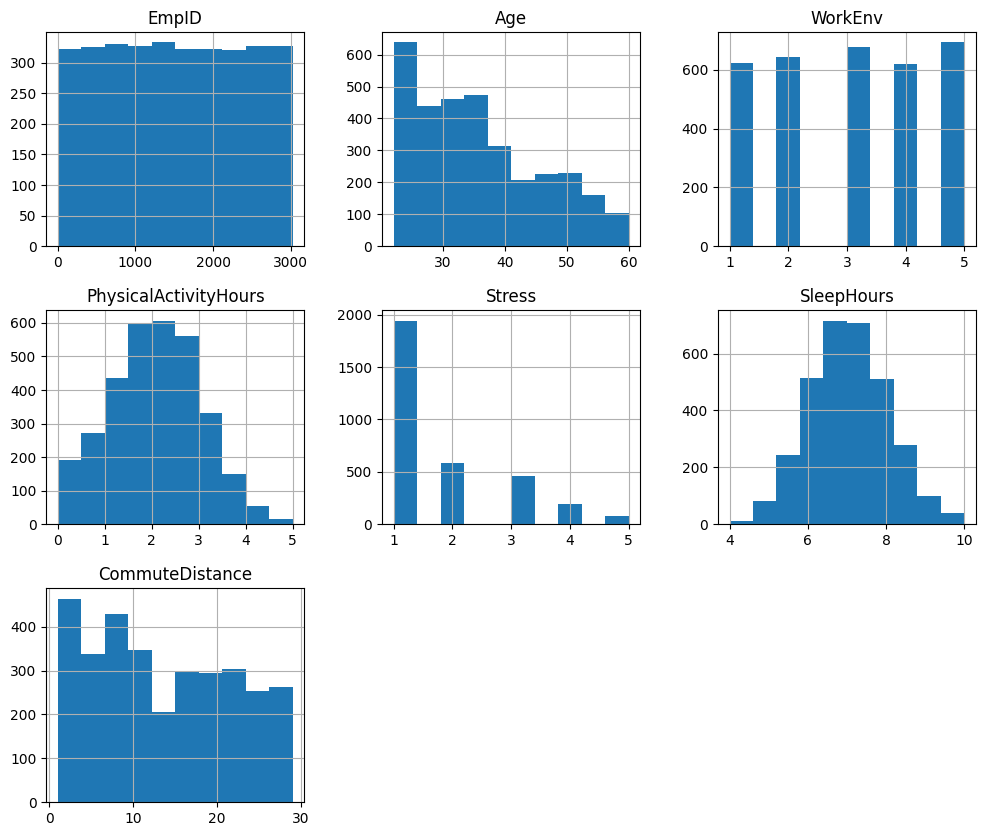

In [12]:
# Melihat distribusi data numerik
employee_survey_df.drop('JobSatisfaction', axis=1).hist(figsize=(12,10));

Setelah mengetahui deskripsi dataset yang akan digunakan, kita akan memulai proses *data preparation*. Pada pengerjaan lab ini, *preparation* yang akan kita lakukan adalah: penanganan duplikasi data, penanganan outlier, dan penanganan missing value, encoding, dan persiapan untuk pelatihan *Machine Learning*.

### Penanganan Duplikasi Data

Duplikasi data terutama dalam jumlah yang besar dapat memengaruhi proses analisis dan pelatihan *Machine Learning*, sehingga penanganan terhadap data duplikat menjadi penting untuk dilakukan. Umumnya dalam `pandas`, penanganan duplikasi data dapat dilakukan dengan operasi drop sebagai berikut:

`DataFrame.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)`

Dokumentasi lebih lengkap dapat kalian pelajari pada: [Dokumentasi Drop Duplicate](https://pandas.pydata.org/pandas-docs/version/1.3/reference/api/pandas.DataFrame.drop_duplicates.html)



#### Nomor 1a

Dari data employee_survey_df di atas, apakah terdapat data duplikat? Implementasikan dengan code!

In [13]:
# Jawaban nomor 1a

#### Nomor 1b

Apabila ada data duplikat, implementasikan penghapusan data duplikat dan tampilkan bukti bahwa sudah tidak ada data duplikat lagi.

In [16]:
# Jawaban nomor 1b

#### Nomor 1c

Apakah langkah pada nomor 1b adalah yang baik? Jika ya, berikan alasan mengapa data duplikat perlu dihapus. Jika tidak, berikan alasan mengapa data duplikat dapat dibiarkan.

Jawaban nomor 1c

### Penanganan Missing Values

Dalam dataset *raw* dalam ukuran yang besar, cukup umum untuk menemukan nilai-nilai yang hilang (*missing values*). Nilai-nilai tersebut dapat diidentifikasi dalam format: 'NaN', '?', 'T/A', atau hanya sebuah sel kosong di dataset. Penyebab dari missing value sendiri beragam, bisa diakibatkan oleh *data corruption* atau kesalahan pada saat *data recording*. Namun juga, terkadang data yang hilang telah disubsitutusi oleh nilai pengganti seperti 0 atau string "null" dan sebagainya tergantung sistem pengumpulan data yang dilakukan. Untuk itu, sekali lagi penting untuk mengetahui kondisi data.

#### Nomor 2a

Pada dataset `employee_survey`, *missing values* ditandai dengan nilai NaN, yang dapat dideteksi dengan mudah menggunakan method Pandas. Lengkapi implementasi fungsi di bawah ini untuk menampilkan **jumlah** dan **persentase** *missing values* untuk setiap kolom. Jalankan fungsi tersebut untuk dataframe yang sudah tidak memiliki data duplikat.

In [18]:
# Jawaban nomor 2a
# Lengkapi implementasi kode mengecek null:
def cek_null(df):
    col_na = XX ##
    percent = XX ##

    missing_data = pd.concat([XX, XX], axis=1, keys=['Total Missing', 'Missing Percentage'])
    print(missing_data)

Penyebab dari data atau nilai yang hilang dapat berbeda-beda. Berdasarkan sumber https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values, terdapat tiga kategori utama untuk kondisi dari *missing values* yang dapat terjadi, yaitu `Missing Completely At Random (MCAR)`, `Missing At Random (MAR)`, dan `Missing Not At Random (MNAR)`. Untuk kategori memiliki penyebabnya masing-masing dan dapat kamu pelajari lebih lanjut pada artikel tersebut dan materi di kelas.



Sama seperti data duplikat, *missing values* juga perlu ditangani dengan beberapa cara populer sebagai berikut:

**Drop column**

Melakukan penghapusan variabel/kolom sehingga variabel tidak lagi digunakan untuk tahapan selanjutnya. Secara umum digunakan bila kolom memiliki proporsi baris *missing value* yang **terlalu banyak** atau tidak memiliki peran penting untuk kepentingan analisis ataupun modelling. Nalar dan pengetahuan umum dapat diterapkan jika kita hendak menghapus suatu kolom jika kita pikir bahwa kolom tersebut tidak terlalu berpengaruh pada tujuan dataset. Sebagai contoh, apabila kita ingin mengukur survival rate penumpang Titanic, atribut nama pada dataset ini tidak mengindikasikan apakah dia survive apa tidak. Selain itu, ada beberapa atribut juga yang mungkin tidak akan mempengaruhi pengukuran tersebut. Sehingga atribut-atribut tersebut dapat didrop.

Kolom/atribut perlu didrop apabila:
*   Kolom tidak intuitif.
*   Kolom mempunyai banyak missing values.
*   Kolom tidak informatif.
*   Kolom dapat membahayakan untuk model tertentu.
*   Kolom tersebut dapat dihasilkan dari atribut yang lain.

**Drop rows**

Melakukan penghapusan pada observasi/baris yang memiliki *missing value*. Secara umum dapat digunakan ketika jumlah obervasi *missing value* pada suatu variabel **relatif kecil** dan tidak terlalu berpengaruh ke kondisi dataset secara keseluruhan.

Penggunaan dropping column/rows memiliki **kelebihan** berupa:
* Implementasi yang mudah
* Tidak mengganggu dataset bila kolom atau baris yang dihapus tidak relevan terhadap analisis

Penggunaan dropping column/rows memiliki **kekurangan** berupa:
- Potensi terjadinya hilangnya informasi
- Mengecilkan jumlah dataset apabila menghapus rows pada suatu kolom yang memiliki banyak *missing value* (secara umum jika menghapus lebih dari 50% baris)

**Imputation**

Melakukan pengisian pada *missing values.* Perlu diingat bahwa penerapan metode *imputation* harus memperhatikan asumsi dari kondisi hilangnya data serta kondisi dari suatu variabel.

Dalam menerapkan imputasi, penting untuk mengetahui **distribusi** dan **tipe data** dari variabel yang hendak dilakukan imputasi.
- Untuk tipe data numerik kontinu distribusi normal, dapat menggunakan **mean**
- Untuk tipe data numerik kontinu distribusi yang skewed, dapat menggunakan **median**
- Untuk tipe data kategorikal (string, binary, ordinal) dapat menggunakan **mode**
- Untuk tipe data numerik diskret, dapat menggunakan **mode**

In [20]:
def fill_null_mean(df):
    mean = df.mean()
    filled_df = df.fillna(mean)
    return filled_df
def fill_null_median(df):
    median = df.median()
    filled_df = df.fillna(median)
    return filled_df
def fill_null_mode(df):
    mode = df.mode()[0]
    filled_df = df.fillna(mode)
    return filled_df

In [21]:
def show_data_type_and_distribution(df):
    print("Menampilkan informasi dataset dan tipe data")
    df.info()
    print('#'*50)
    for col in df.columns:
      if pd.api.types.is_numeric_dtype(df[col]):
          plt.figure(figsize=(3,3))
          sns.histplot(df[col])
          plt.show()
      else:
          plt.figure(figsize=(4,3))
          sns.countplot(y=df[col])
          plt.show()

Menampilkan informasi dataset dan tipe data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3262 entries, 0 to 3261
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EmpID                  3262 non-null   int64  
 1   Age                    3255 non-null   float64
 2   JobLevel               3045 non-null   object 
 3   Dept                   3132 non-null   object 
 4   WorkEnv                3262 non-null   int64  
 5   PhysicalActivityHours  3222 non-null   float64
 6   Stress                 3260 non-null   float64
 7   SleepHours             3203 non-null   float64
 8   CommuteMode            3076 non-null   object 
 9   CommuteDistance        3200 non-null   float64
 10  JobSatisfaction        3250 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 280.5+ KB
##################################################


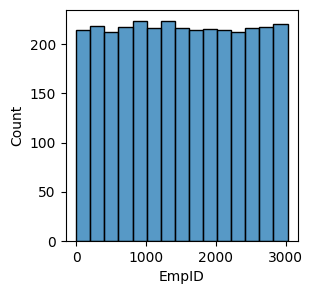

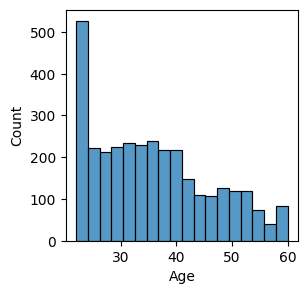

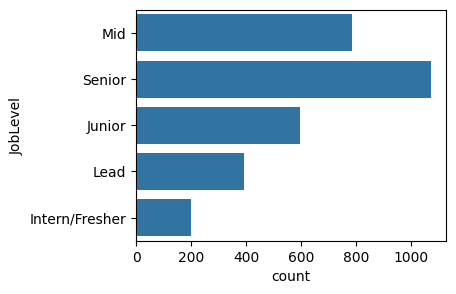

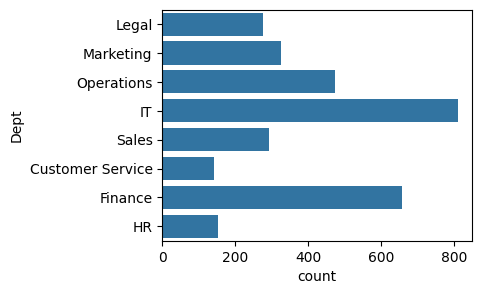

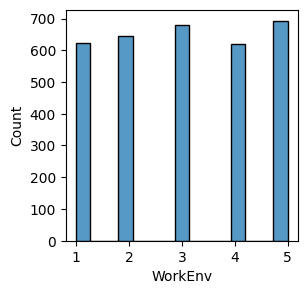

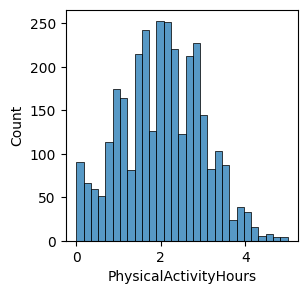

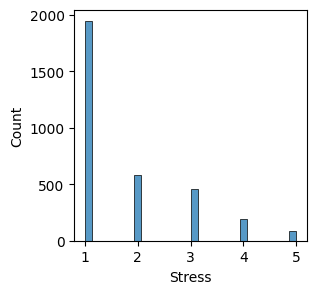

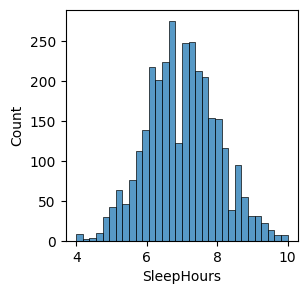

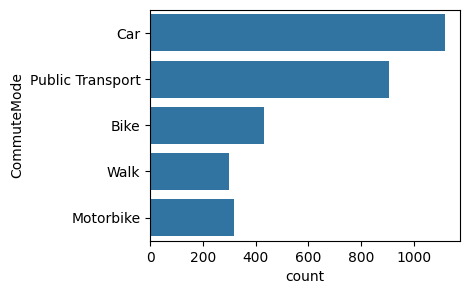

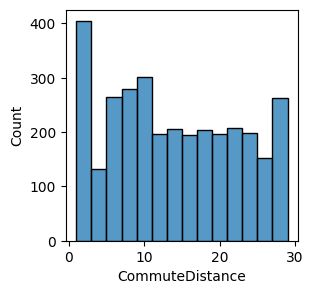

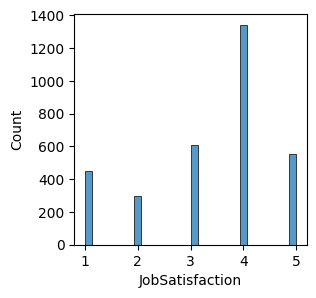

In [22]:
# Jalankan kode ini
show_data_type_and_distribution(employee_survey_df)

**Membiarkan data yang hilang**

Hal ini dapat dilakukan jika kita berasumsi data dapat berguna untuk tahapan analisis selanjutnya meskipun dalam keadaan *missing* (null/NaN/None, etc)

#### Nomor 2b

Berdasarkan distribusi dan tipe data di atas, lakukan imputasi untuk setiap kolom yang mengandung nilai null dengan asumsi data hilang dengan kondisi MCAR. Berikan alasan (tipe data dan/atau distribusi) dari setiap pemilihan nilai pengganti. Tampilkan juga bukti bahwa sudah tidak ada *missing values* tersisa.

In [23]:
# Jawaban nomor 2b

#### Nomor 2c

Menurut kamu, bisakah *missing values* pada dataset ini ditangani dengan drop rows saja? Berikan data dan alasan pendukung.

Jawaban nomor 2c

### Encoding

Dalam dataset, tipe data yang ada tidak selalu numerik, tetapi bisa juga kategorikal. Dalam beberapa kasus, seperti pelatihan *Machine Learning*, diperlukan data dalam bentuk angka untuk dapat digunakan untuk komputasi. Oleh karena itu, kita akan belajar tentang *Encoding*, langkah untuk mengubah tipe data kategorikal menjadi bentuk numerik.

Adapun dalam dataset `employee_survey`, terdapat 6 kolom atribut dengan data kategorikal, yaitu EmpID, JobLevel, WorkEnv, Stress, CommuteMode, dan JobSatisfaction. Akan tetapi sebagian sudah dalam bentuk numerik seperti WorkEnv, Stress, dan JobSatisfaction, maka kita akan berfokus pada atribut sisanya.

Terdapat banyak metode *Encoding* yang cukup umum digunakan, kita akan belajar tentang, **Label encoding**, yaitu mengubah ke bentuk integer secara *unique* tanpa atau dengan makna tertentu. Lebih lanjut, juga terdapat **Ordinal label encoding** yang merupakan bagian dari *label encoding*, yaitu mengubah ke bentuk integer secara *unique* dengan urutan atau tingkatan, seperti WorkEnv, Stress, dan JobSatisfaction.

In [28]:
print("Menampilkan nilai unique yang terdapat pada setiap kolom kategorikal")
for col in employee_survey_df.select_dtypes(include=object).columns:
    print(col, f": {len(employee_survey_df[col].unique())}", employee_survey_df[col].unique())

Menampilkan nilai unique yang terdapat pada setiap kolom kategorikal
JobLevel : 6 ['Mid' 'Senior' 'Junior' 'Lead' nan 'Intern/Fresher']
Dept : 9 ['Legal' 'Marketing' 'Operations' 'IT' 'Sales' 'Customer Service' nan
 'Finance' 'HR']
CommuteMode : 6 ['Car' 'Public Transport' 'Bike' 'Walk' nan 'Motorbike']


Sebagai contoh, kita akan melakukan *label encoding* terhadap atribut `CommuteMode`. Dengan asumsi tidak ada urutan atau tingkatan pada jenis moda yang digunakan, maka kita akan akan melakukan *encoding* dengan label acak menggunakan `LabelEncoder` milik `scikit-learn`.

In [29]:
label_encoder = LabelEncoder()

employee_survey_df.CommuteMode = label_encoder.fit_transform(employee_survey_df.CommuteMode)
employee_survey_df.CommuteMode

,CommuteMode
0,1
1,1
2,3
3,0
4,3
...,...
3257,3
3258,3
3259,0
3260,0


In [30]:
# Menampilkan mapping nilai kategori
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mapping

{'Bike': 0, 'Car': 1, 'Motorbike': 2, 'Public Transport': 3, 'Walk': 4, nan: 5}

Akan tetapi, apabila kita ingin menentukan sendiri pemetaan nilai kategori dan integernya, kita bisa menggunakan fungsi `map()` sebagai berikut:

```python
employee_survey_df.CommuteMode = employee_survey_df.CommuteMode.map({'Bike': 0, 'Car': 1, 'Motorbike': 2, 'Public Transport': 3, 'Walk': 4})
```

#### Nomor 3

Lakukan juga *encoding* pada atribut JobLevel dan Dept. Berikan alasan mengapa kamu memilih metode *encoding* (Label Encoding saja atau Ordinal Label Encoding) tersebut.

In [52]:
# Jawaban nomor 3

### Penanganan Outlier

Outliers merupakan nilai observasi yang sangat jauh, titik ekstrim, atau tidak wajar dari distribusi suatu variabel. Nilai yang dimaksud ini bisa merupakan nilai yang **terlalu besar** atau **terlalu kecil** dibandingkan nilai-nilai lainnya. Kehadiran outliers dapat terjadi karena beberapa hal:
1. Kesalahan human error pada penginputan
2. Kesalahan sampling atau mengambil sampel yang terlalu ekstrim
3. Kesalahan pemprosesan data
4. Alami/Natural atau memang terdapat outliers pada kenyataan observasi suatu variabel

Dalam mendeteksi dan menganalisis suatu outlier, lagi-lagi penting bagi kita untuk memperhatikan **distribusi** dan konteks suatu atribut serta tujuan secara umum dari penggunaan dataset.

Berikut merupakan semacam **guideline** singkat untuk melakukan analisis outlier:
1. Jika kita menggunakan dataset untuk kepentingan prediksi menggunakan model yang **sensitif terhadap outlier** (contohnya Regresi Linear, selengkapnya akan dibahas pada lab-lab selanjutnya), kita dapat melakukan **drop outlier**. Membiarkan outlier dapat menyebabkan terjadinya **overfitting** pada model prediksi tertentu ataupun menyebabkan berkurangnya akurasi pada model-model tertentu sehingga perlu di drop. Terlebih lagi, apabila persentase outlier cenderung kecil dan tidak membantu jika dibiarkan.
2. Jika asumsi kita adalah outlier pada data merupakan **noise** atau muncul akibat **error/kesalahan observasi**, sebaiknya dilakukan **drop outlier** untuk membersihkan data.
4. Jika asumsi kita adalah outlier yang muncul pada data merupakan hal yang alami/wajar sebagaimana kenyataan pada suatu variabel, kita dapat membiarkannya pada data.

Mendeteksi outliers memiliki banyak cara tergantung dari sifat setiap distribusi variabel maupun dataset secara keseluruhan. Berikut merupakan cara yang populer dan banyak digunakan:
1. Z-Score atau Standar Deviasi: Metode ini dapat digunakan untuk mendeteksi outlier pada data yang berdistribusi **normal**. Definisi outlier pada Z-Score adalah nilai-nilai yang jatuh pada **nilai standar deviasi > 3 atau < -3**
3. Interquartile range (IQR): Metode ini mendeketsi outlier yang melebihi batas atas $Q3+ 1.5 *IQR$ atau kurang dari batas bawah $Q1 - 1.5*IQR$ dimana $IQR = Q3-Q1$. Metode ini secara umum dapat digunakan untuk distribusi yang tidak normal
3. Boxplot: Metode ini dapat digunakan untuk menampilkan outliers secara visual sehingga lebih intuitif untuk melihat kemunculannya dan melakukan analisis. Adapun nilai yang digunakan adalah IQR.

In [33]:
def show_boxplot(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    for col in df.select_dtypes(include=numerics):
        plt.figure(figsize=(3,3))
        sns.boxplot(x=df[col])
        plt.show()

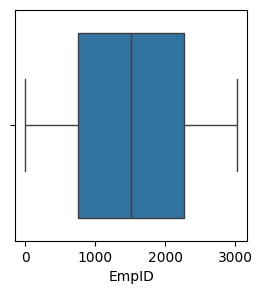

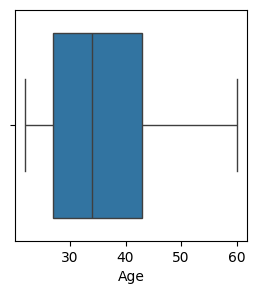

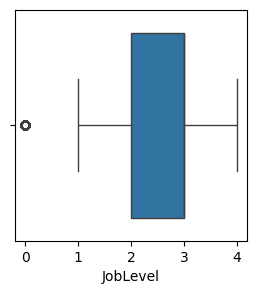

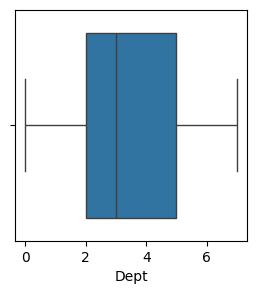

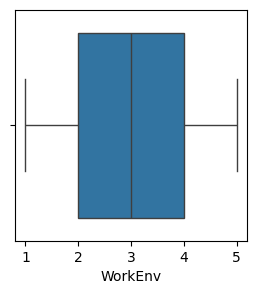

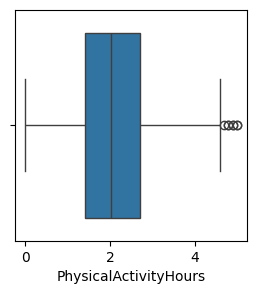

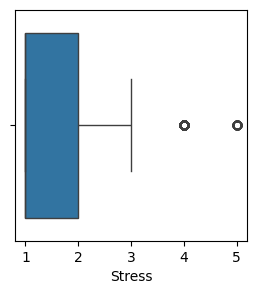

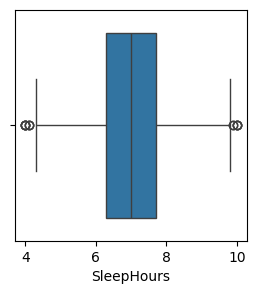

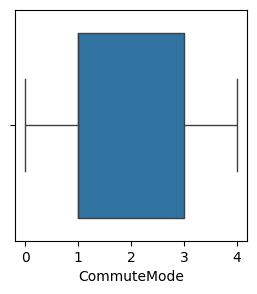

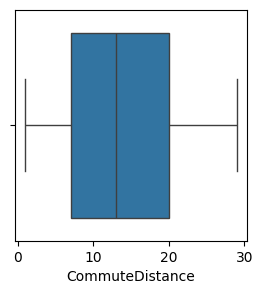

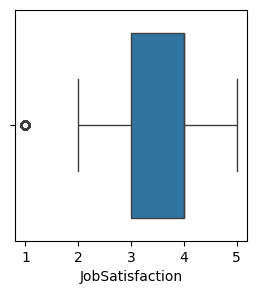

In [34]:
show_boxplot(employee_survey_df)

#### Nomor 4a

Dengan menggunakan metode IQR, implementasikan dengan kode untuk menampilkan jumlah *outlier* pada setiap kolom.

In [53]:
# Jawaban nomor 4a

#### Nomor 4b

Dengan menggunakan metode IQR, implementasikan dengan kode untuk menghapus seluruh *outlier* pada setiap kolom **numerik** dan bukan kategorikal.

In [54]:
# Jawaban nomor 4b

#### Nomor 4c

Perhatikan juga bahwa ada nilai outlier pada kolom kategorikal seperti JobLevel dan Stress. Berikan pendapat mengenai apa yang sebaiknya perlu dilakukan pada data outlier pada kolom-kolom tersebut dan berikan bukti pendukung.

Jawaban nomor 4c

# Dimensionality Reduction

Pada analisis data dan *machine learning*, terdapat tahapan *dimensionality reduction*, yang sesuai namanya, mengacu pada teknik untuk mengurangi dimensi data namun berusaha untuk **memaksimalkan** informasi yang dapat dipertahankan.

Teknik dimensionality reduction terbagi menjadi dua kategori besar:
1. Feature Selection: mencari sekelompok fitur-fitur yang paling relevan untuk prediksi.
2. Feature Extraction: melakukan pemetaan suatu atribut menjadi atribut lain untuk mengurangi dimensi. Contohnya:
    * Principal Component Analysis (PCA)
    * Singular Value Decomposition (SVD)
    * Linear Discriminant Analysis (LDA)

## Principal Component Analysis (PCA)

PCA nerupakan salah satu teknik *dimensionality reduction* yang dilakukan untuk mentransformasikan data **numerik** dengan dimensi tinggi ke dimensi yang lebih rendah (mengurangi kompleksitas fitur). Cara kerjanya adalah mengindentifikasi vektor-vektor ortogonal yang disebut sebagai *principal components* yang mencoba menangkap variansi secara maksimal. *Principal components* pertama menangkap variansi terbesar pada data, *principal components* kedua menangkap variansi maximum yang *orthogonal* dari *principal components* pertama, dan seterusnya. Variansi data dapat ditangkap secara sempurna ketika jumlah *principal components* = jumlah dimensi. **Namun,** pada sebagian besar kasus, terutama data dengan dimensi yang sangat besar, variansi data dapat ditangkap secara cukup menggunakan jumlah *principal components* yang relatif kecil. (Baca selengkapnya pada PPT PCA yang terdapat di scele).

## Tahapan PCA

Dengan dataset [`diabetes`](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) dari `sklearn`, kita akan melakukan tahapan PCA sebagai berikut.

In [37]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes['data'],columns=diabetes['feature_names'])

# mengukur shape input
print(diabetes_df.shape)

(442, 10)


In [38]:
# Melihat shape dari dataframe
total_rows, total_attributes = diabetes_df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

Jumlah data: 442
Jumlah atribut: 10


In [39]:
# Melihat nama atribut dalam dataframe
print("-----Berikut adalah daftar kolom/attribut dalam dataset-----")
print()
print(diabetes_df.columns)

-----Berikut adalah daftar kolom/attribut dalam dataset-----

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


In [40]:
# Melihat 5 elemen teratas dalam dataframe
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [41]:
# Melihat statistik deskriptif dataset
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


### Manual

In [42]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Membagi dataframe menjadi X (atribut) dan Y (target)
X_manual = diabetes_df.drop('sex', axis=1)
Y_manual = diabetes['target']

# Encode labels dalam label X dan target Y
object_cols = X_manual.select_dtypes(include=['object']).columns
for col in object_cols:
    X_manual[col] = label_encoder.fit_transform(X_manual[col])
Y_manual = label_encoder.fit_transform(Y_manual)

# Melakukan scaling
scaler = StandardScaler()
scaler.fit(X_manual)

scaled_data = scaler.transform(X_manual)

# Covariance Matrix
features = scaled_data.T
cov_matrix = np.cov(features)

# Eigen decomposition
values, vectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(values)[::-1]

values = values[sorted_indices]
vectors = vectors[:, sorted_indices]

explained_variances = []

for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values) * 100)

print(np.sum(explained_variances))
print(explained_variances)

100.00000000000001
[43.51122746834947, 15.479398422180951, 13.332580181840212, 8.250546350561576, 6.704130155439605, 6.033392766418623, 5.723234009846879, 0.8702563395221858, 0.09523430584051859]


Berdasarkan hasil PCA yang kita lakukan secara manual, kita mendapatkan nilai *explained variance* untuk *principal component* 1, 2, dan seterusnya yaitu 17.302, 10.909, dan seterusnya. Perhatikan juga bahwa untuk masing-masing *principal component*, semakin tinggi *eigen value* maka semakin tinggi juga nilai *explained variance*.

### Menggunakan library sklearn

In [43]:
# Membagi dataframe menjadi X (atribut) dan Y (target)

X = diabetes_df.drop('sex', axis=1)
Y = diabetes['target']

# Encode labels dalam label X dan target Y
object_cols = X.select_dtypes(include=['object']).columns
for col in object_cols:
    X[col] = label_encoder.fit_transform(X[col])
Y = label_encoder.fit_transform(Y)

# Melakukan scaling
scaler = StandardScaler()
scaler.fit(X)

scaled_data = scaler.transform(X)

# Import modul PCA
from sklearn.decomposition import PCA

# initialize PCA
pca = PCA()

# Fit the model with "scaled_data"
pca.fit(scaled_data)

# Transformasi PCA
trans_pca = pca.transform(scaled_data)

# Menampilkan nilai explained variants
explained_variants = pca.explained_variance_ratio_
explained_variants

array([0.43511227, 0.15479398, 0.1333258 , 0.08250546, 0.0670413 ,
       0.06033393, 0.05723234, 0.00870256, 0.00095234])

Perhatikan bahwa nilai *explained variance* menggunakan library sklearn ataupun menggunakan PCA secara manual sama saja.

In [44]:
# Menampilkan nilai cumulative explained variants
np.cumsum(pca.explained_variance_ratio_ * 100)

array([ 43.51122747,  58.99062589,  72.32320607,  80.57375242,
        87.27788258,  93.31127534,  99.03450935,  99.90476569,
       100.        ])

Text(0, 0.5, 'Explained vairance')

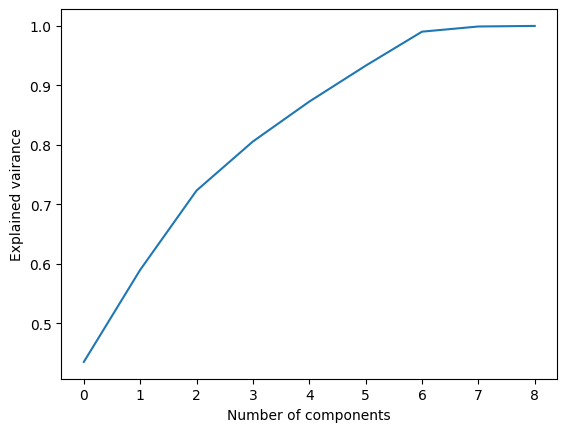

In [45]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained vairance")

Berdasarkan operasi di atas, kita dapat melihat bahwa nilai explained variance sebanyak 93% atau 93% dari variansi data sudah bisa kita dapatkan hanya dengan menggunakan  principal components (6 dari 9 atribut). Selanjutnya mari kita visualisasikan data sebelum dan sesudah dilakukan PCA.

In [46]:
# Melakukan invers PCA 2 atribut
def inverse_pca(pca_data, pca, remove_n):
    transformed = pca_data.copy()
    transformed[:, -remove_n:] = 0
    return pca.inverse_transform(transformed)

LL = inverse_pca(trans_pca, pca, 3)

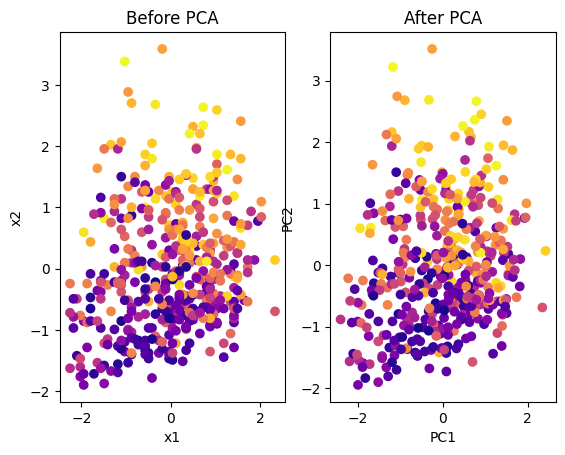

In [47]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(x=scaled_data[:,0], y=scaled_data[:,1], c=Y, cmap='plasma')
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(x=LL[:,0], y= LL[:,1],c=Y, cmap='plasma')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

Berdasarkan visualisasi di atas, kita bisa melihat bahwa plot data sebelum dan sesudah PCA mirip. Hal ini karena kita dapat memaksimalisasi nilai explained variance terutama pada Principal Component 1 dan 2.

Kita dapat melihat bahwa perbandingan visualisasi data menggunakan atribut asli dengan visualisasi menggunakan PC1 (Principal Component 1) dan PC2 (Principal Component 2) menunjukkan visualisasi scatter plot yang cukup mirip. Hal ini karena PC1 dan PC2 "menangkap" variasi terbesar dari dataset

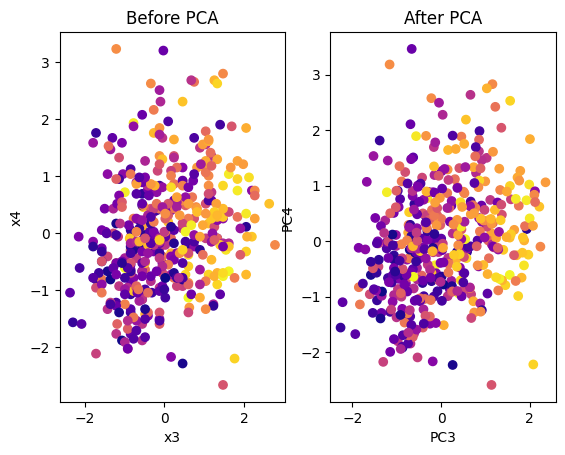

In [48]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(scaled_data[:,2],scaled_data[:,3],c=Y, cmap='plasma')
axes[0].set_xlabel('x3')
axes[0].set_ylabel('x4')
axes[0].set_title('Before PCA')
axes[1].scatter(LL[:,2],LL[:,3],c=Y, cmap='plasma')
axes[1].set_xlabel('PC3')
axes[1].set_ylabel('PC4')
axes[1].set_title('After PCA')
plt.show()

Sementara itu, ketika kita membandingkan visualisasi data asli dengan PC3 dan PC4, kita dapat melihat bahwa ada perbedaan yang lebih besar, misalnya kita lihat bentuk scatter plot untuk kelompok berwarna biru lebih menyebar pada visualisasi "After PCA" dibandingkan "Before PCA". Hal ini karena variasi data pada PC3 dan PC4 lebih kecil dibandingkan PC1 dan PC2

Selain menggunakan grafik dua dimensi (2D), kita juga dapat melakukan visualisasi PCA menggunakan grafik tiga dimensi (3D). Contohnya adalah sebagai berikut:

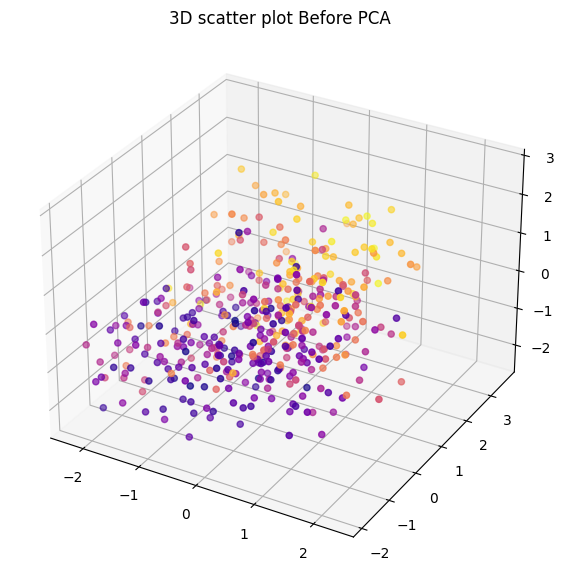

In [49]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter(scaled_data[:,0],scaled_data[:,1], scaled_data[:,2], c=Y, cmap='plasma')
plt.title("3D scatter plot Before PCA")
plt.show()

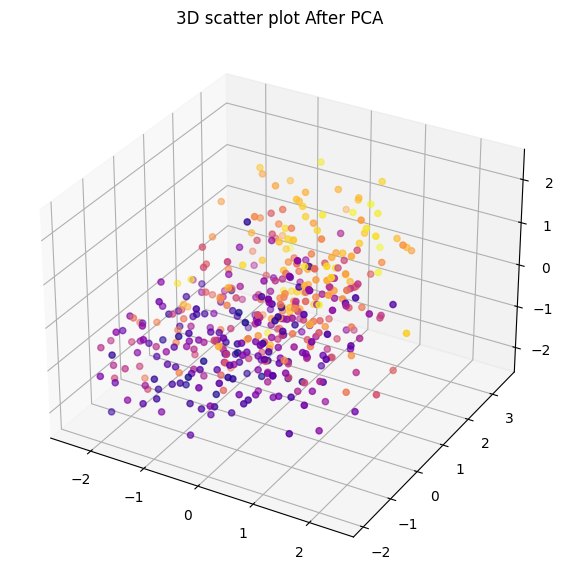

In [50]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter(LL[:,0],LL[:,1], LL[:,2], c=Y, cmap='plasma')
plt.title("3D scatter plot After PCA")
plt.show()

Pada visualisasi di atas, kita melihat proyeksi tiga dimensi untuk scatter plot sebelum PCA (menggunakan data asli) dan setelah PCA (menggunakan PC1, PC2, PC3). Dapat kita lihat bahwa persebaran datanya mirip, namun masih terdapat beberapa perbedaan di antara keduanya, hal ini karena tiga principal component yang kita pilih tidak menangkap 100% variasi dataset.

Lebih lanjut, kita juga dapat melihat informasi dari mana nilai setiap fitur hasil PCA berasal pada *code cell* berikut. Dapat dilihat bahwa setiap PC merupakan kombinasi linear dari fitur-fitur semula. Sebagai contoh, PC1 dapat diperoleh dari `0.217734 * age + 0.312709 * bmi + 0.271650 * bp + 0.361226 * s1 + 0.363698 * s2 - 0.272750 * s3 + 0.431261 * s4 + 0.388966 * s5 + 0.326462 * s6` dengan setiap koefisien menggambarkan kontribusi relatif dari setiap fitur terhadap PC1. Dengan begitu, kita dapat memilih untuk menghapus beberapa PC dengan *explained variance* terkecil tanpa kehilangan informasi yang signifikan.

In [51]:
pd.DataFrame(pca.components_, columns=X.columns, index=['PC' + str(i) for i in range (1, X.shape[1] + 1)])

,age,bmi,bp,s1,s2,s3,s4,s5,s6
PC1,0.217734,0.312709,0.271650,0.361226,0.363698,-0.272750,0.431261,0.388966,0.326462
PC2,-0.039828,0.287888,0.193923,-0.577071,-0.500557,-0.505754,0.059845,0.113707,0.148535
PC3,0.526880,0.094000,0.497787,-0.007214,-0.208152,0.450033,-0.394351,0.024028,0.252528
PC4,0.750438,-0.469370,-0.232010,-0.137946,0.013744,-0.299980,0.185083,-0.103069,-0.092851
PC5,-0.164993,-0.374998,-0.344111,-0.001910,-0.151162,0.097139,-0.029669,0.208327,0.798230
PC6,0.247263,0.650840,-0.562822,-0.047466,0.102930,0.059720,-0.093774,-0.355999,0.215772
PC7,0.147679,0.155197,-0.388690,0.100671,-0.306657,0.175129,-0.068482,0.740608,-0.339104
PC8,0.007882,0.042768,0.026709,-0.041871,-0.359407,0.481908,0.773443,-0.189155,-0.015457
PC9,0.003623,0.007678,-0.002477,0.709422,-0.563022,-0.318425,-0.089919,-0.264878,0.002902


### Nomor 7

Mengapa di dalam tahapan PCA perlu dilakukan scaling?

Jawaban nomor 7

### Nomor 8

Berdasarkan contoh implementasi PCA diatas, jelaskan tiap step yang dilakukan.

Jawaban nomor 8

### Nomor 9

Setelah memahami tahapan dan implementasi PCA, menurut kamu, kapan sebaiknya PCA dilakukan?

Jawaban nomor 9